In [1]:
import numpy as np
from scipy.fft import fft
from matplotlib import pyplot as plt

import ipywidgets as widgets

In [2]:
sr = 100
LT = 5
#
t = np.linspace(0, LT, LT*sr)

In [3]:
xt = np.sin(2*np.pi * 0.3*t)

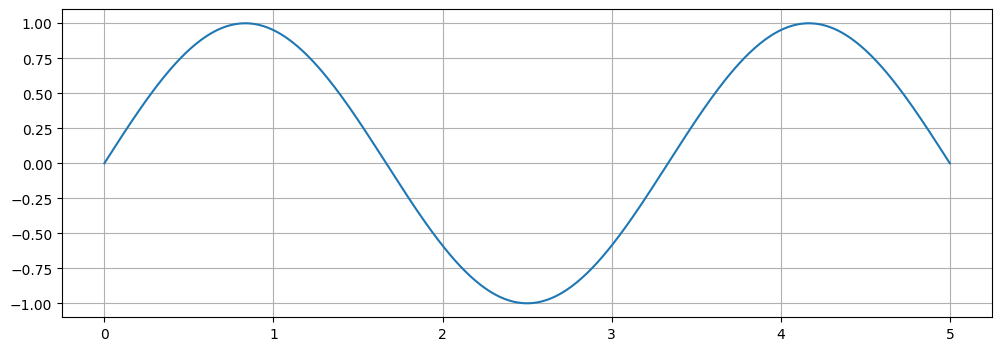

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(t, xt)
plt.grid(True)

$$\dfrac{4}{\pi}\sum_{k=1}^\infty \dfrac{1}{2k - 1} sin(2\pi(2k -1)t)$$

In [54]:
def fft_func(x, sr=100):
    xf = fft(x)
    #
    L = xf.shape[0]
    mag = np.absolute(xf[:L//2])
    f   = np.linspace(0, sr//2, L//2)
    #
    return f, mag

In [50]:
@widgets.interact(k=(1, 25), components=[False, True])
def square_wave(k, components):
    frecs = 2*np.pi*(2*np.arange(1, k+1) - 1)
    m_frecs = frecs*t[:, np.newaxis]
    xt_parc = np.sin(m_frecs) / frecs
    xt = 4/np.pi * xt_parc.sum(axis=1)
    #
    plt.figure(figsize=(12, 4))
    if components:
        for x in xt_parc.T:
            plt.plot(t, x, color='orange')
    #
    plt.plot(t, xt)
    plt.grid(True)

interactive(children=(IntSlider(value=13, description='k', max=25, min=1), Dropdown(description='components', …

In [55]:
@widgets.interact(k=(1, 25), components=[False, True])
def square_wave(k, components):
    frecs = 2*np.pi*(2*np.arange(1, k+1) - 1)
    m_frecs = frecs*t[:, np.newaxis]
    xt_parc = np.sin(m_frecs) / frecs
    xt = 4/np.pi * xt_parc.sum(axis=1)
    #
    plt.figure('Time domain', figsize=(12, 2))
    if components:
        for x in xt_parc.T:
            plt.plot(t, x, color='orange')
    #
    plt.plot(t, xt)
    plt.grid(True)
    #
    f, mag = fft_func(xt)
    plt.figure('Frequency domain', figsize=(12, 2))
    plt.plot(f, mag)
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=13, description='k', max=25, min=1), Dropdown(description='components', …

In [56]:
import os
import pandas as pd

home = os.path.expanduser('~')
path = "/Dropbox/Brain/data/cursos/senales/ecg/"
fname = 'ECG.csv'

data = pd.read_csv(home + path + fname)

In [14]:
data

Tiempo(s)    CH1(V)
0       0.00000 -0.015717
1       0.00025 -0.013341
2       0.00050 -0.015038
3       0.00075 -0.012662
4       0.00100 -0.015378
...         ...       ...
7995    1.99875 -0.019451
7996    1.99900 -0.021828
7997    1.99925 -0.018093
7998    1.99950 -0.018093
7999    1.99975 -0.013680

[8000 rows x 2 columns]

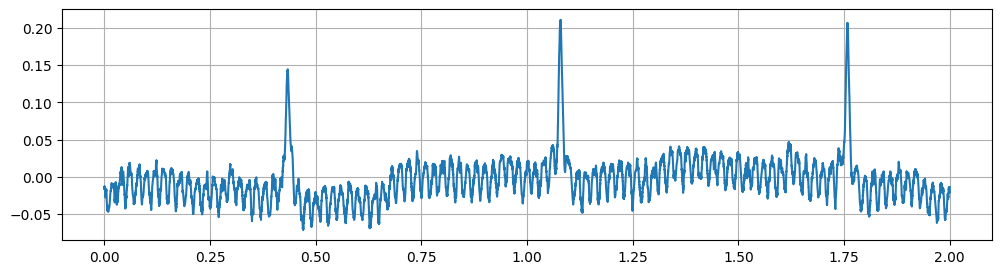

In [57]:
xt = data.values
plt.figure(figsize=(12, 3))
plt.plot(xt[:, 0], xt[:, 1])
plt.grid(True)

In [24]:
sr = 1/xt[1, 0]
L  = xt.shape[0]

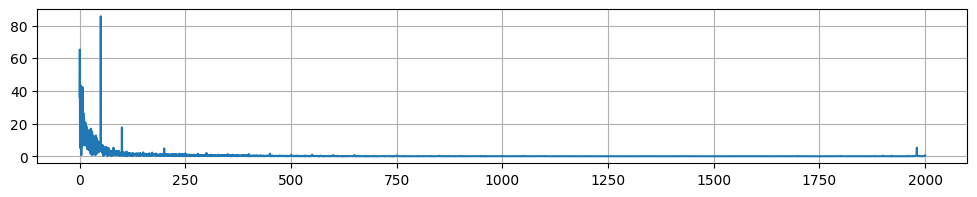

In [58]:
f, mag = fft_func(xt[:, 1], sr)
plt.figure('Frequency domain', figsize=(12, 2))
plt.plot(f, mag)
plt.grid(True)
plt.show()

In [62]:
@widgets.interact(slice_s=(50, 1000))
def ecg_spectrum(slice_s):
    plt.figure('Frequency domain', figsize=(12, 2))
    plt.plot(f[: slice_s], mag[: slice_s])
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=525, description='slice_s', max=1000, min=50), Output()), _dom_classes=(…